# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

Webscrapping inflation data on website www.imdb.com

![](Captureee.jpg)


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [5]:
#melihat tampilan data soup dengan lebih baik (dengan pretiify)
print(soup.prettify()[1:777])

!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events 


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [6]:
table = soup.find("div", attrs={"lister-list"})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8111088/">
    <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,6


In [7]:
div = table.find_all("div",attrs="lister-item-content")
div[:2]

[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt8111088/">The Mandalorian</a>
 <span class="lister-item-year text-muted unbold">(2019– )</span>
 </h3>
 <p class="text-muted">
 <span class="runtime">40 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Action, Adventure, Sci-Fi            </span>
 </p>
 <div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="8.8" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>8.8</strong>
 </div>
 <div class="inline-block ratings-user-rating">
 <span class="userRatingValue" data-tconst="tt8111088" id="urv_tt8111088">
 <span class="global-sprite rating-star no-rating"></span>
 <span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
 </span>
 <div class="starBarWidget" id="sb_tt8111088">
 <div class="rating rating-list" data-csrf-token="" data-ga-id

Do the scrapping process here (please change this markdown with your explanation)

In [8]:
temp = [] #initiating a tuple

for i in range(0, len(div)):

    row = table.find_all("div",attrs="lister-item-content")[i]
    
    #mengambil data judul
    Title = row.find("a").text
    Title = Title.strip()

    #mengambil data imdb rating
    Rating = row.find("strong").text
    Rating = Rating.strip()
    
    #mengambil data metascore
    try :
        Metascore = row.find('span',attrs='metascore favorable').text
        Metascore = Metascore.strip()
    except :
        Metascore = 0
        
    #mengambil data votes
    Votes = row.find('span',attrs={"name":'nv'}).text
    Votes = Votes.strip()
        
    temp.append((Title,Rating,Metascore,Votes))
    
temp 

[('The Mandalorian', '8.8', 0, '299,094'),
 ('For All Mankind', '7.7', 0, '14,293'),
 ('The Boys', '8.7', 0, '252,998'),
 ('Avengers: Endgame', '8.4', '78', '830,493'),
 ('Prodigal Son', '7.7', 0, '13,505'),
 ('The Witcher', '8.2', 0, '304,018'),
 ('Sound of Metal', '7.8', '82', '38,778'),
 ('Servant', '7.6', 0, '20,564'),
 ('Captain Marvel', '6.9', '64', '454,129'),
 ('Gisaengchung', '8.6', '96', '574,088'),
 ('Once Upon a Time... in Hollywood', '7.6', '83', '563,386'),
 ('Batwoman', '3.4', 0, '32,962'),
 ('Sex Education', '8.3', 0, '160,956'),
 ('Euphoria', '8.4', 0, '66,686'),
 ('Chernobyl', '9.4', 0, '550,216'),
 ('Knives Out', '7.9', '82', '469,682'),
 ('Joker', '8.4', 0, '960,561'),
 ('Gemini Man', '5.7', 0, '89,647'),
 ('The Gentlemen', '7.8', 0, '249,211'),
 ('The Morning Show', '8.4', 0, '53,534'),
 ('Pennyworth', '7.9', 0, '9,159'),
 ('Midsommar', '7.1', '72', '207,006'),
 ('Virgin River', '7.5', 0, '20,728'),
 ('1917', '8.3', '78', '440,652'),
 ('Dickinson', '7.3', 0, '6,648

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns=("Title","Rating","Metascore","Votes"))
df.head()

,Title,Rating,Metascore,Votes
0,The Mandalorian,8.8,0,"299,094"
1,For All Mankind,7.7,0,"14,293"
2,The Boys,8.7,0,"252,998"
3,Avengers: Endgame,8.4,78,"830,493"
4,Prodigal Son,7.7,0,"13,505"


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      50 non-null     object
 1   Rating     50 non-null     object
 2   Metascore  50 non-null     object
 3   Votes      50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [10]:
#menghilangkan tanda baca koma "," pada kolom votes
df["Votes"] = df["Votes"].str.replace(",","")

In [11]:
#mengubah tipe data
df["Rating"] = df["Rating"].astype("float64")
df["Votes"] = df["Votes"].astype("int64")
df["Metascore"] = df["Metascore"].astype("int64")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      50 non-null     object 
 1   Rating     50 non-null     float64
 2   Metascore  50 non-null     int64  
 3   Votes      50 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB


In [78]:
df.head()

,Title,Rating,Metascore,Votes
0,The Mandalorian,8.8,0,298976
1,For All Mankind,7.7,0,14281
2,The Boys,8.7,0,252923
3,Avengers: Endgame,8.4,78,830265
4,Prodigal Son,7.7,0,13497


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [12]:
data1 = df.groupby('Title').sum()[["Rating"]].sort_values(by="Rating",ascending=False)
data1.head()

,Rating
Title,
Chernobyl,9.4
The Mandalorian,8.8
Yakusoku no Neverland,8.7
Demon Slayer: Kimetsu No Yaiba,8.7
The Boys,8.7


<AxesSubplot:ylabel='Film'>

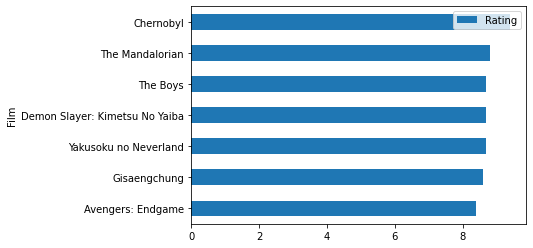

In [30]:
data1.head(7).sort_values(by="Rating",ascending=True).plot(kind="barh",xlabel="Film",ylabel="Value")

In [14]:
data2 = df.groupby('Title').sum()[["Rating"]].sort_values(by="Rating",ascending=True)
data2.head()

,Rating
Title,
Batwoman,3.4
After,5.3
Gemini Man,5.7
Star Wars: Episode IX - The Rise of Skywalker,6.6
The Informer,6.6


<AxesSubplot:ylabel='Film'>

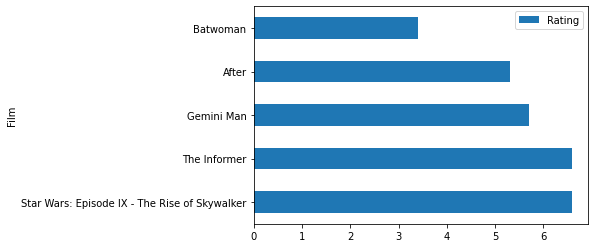

In [31]:
data2.head().sort_values(by="Rating",ascending=False).plot(kind="barh",xlabel="Film",ylabel="Value")

In [16]:
data3 = df.groupby('Title').sum()[["Metascore"]].sort_values(by="Metascore",ascending=False)
data3.head()

,Metascore
Title,
Gisaengchung,96
The Irishman,94
Little Women,91
The Lighthouse,83
Once Upon a Time... in Hollywood,83


<AxesSubplot:ylabel='Film'>

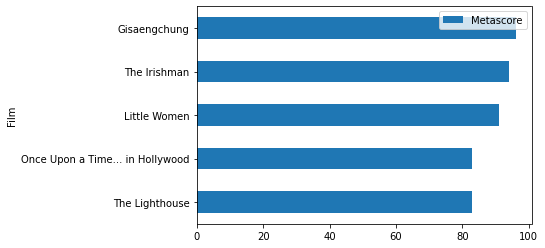

In [32]:
data3.head().sort_values(by="Metascore",ascending=True).plot(kind="barh",xlabel="Film",ylabel="Value")

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:ylabel='Film'>

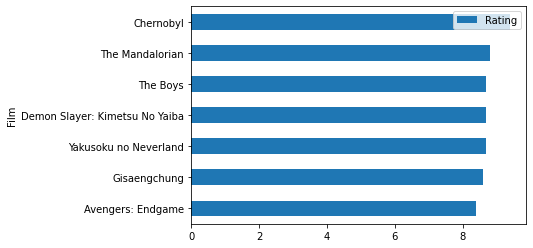

In [27]:
data1.head(8).sort_values(by="Rating",ascending=True).plot(kind="barh",xlabel="Film",ylabel="Value")

<AxesSubplot:ylabel='Film'>

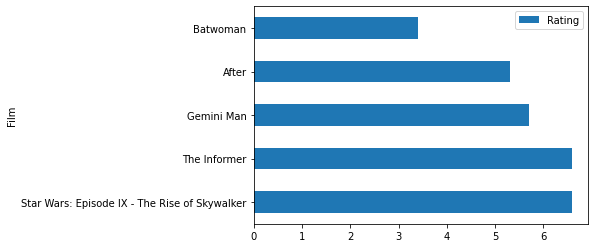

In [28]:
data2.head(8).sort_values(by="Rating",ascending=False).plot(kind="barh",xlabel="Film",ylabel="Value")

<AxesSubplot:ylabel='Film'>

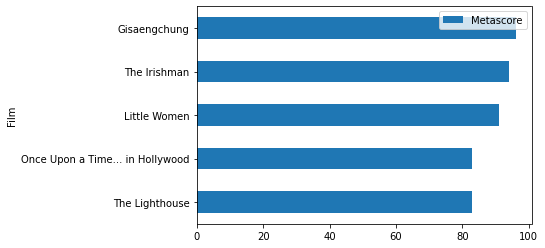

In [29]:
data3.head().sort_values(by="Metascore",ascending=True).plot(kind="barh",xlabel="Film",ylabel="Value")


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.